#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

**ΘΕΩΡΗΤΙΚΟ ΜΕΡΟΣ**

1. Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση
ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν
τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα.
2. Ποιες είναι οι βασικές διαφορές στην αρχιτεκτονική και την απόδοση μεταξύ των τριών
δικτύων;


1. 
Layers:
Inside parenthesis is the number of feature maps (ConvLayers) or the number of neurons (FC layers)
<ul>
  <li> LeNet: ConvLayer (4) (H1) -> Pooling (H2) -> ConvLayer (12) (H3) -> Pooling (H4) -> Dense Layer (FC) with 10 outputs (εάν και βλέπουμε και υλοποιήσεις με 3 FC (FC (120) -> FC (84) -> FC (10)) </li>
  <li> AlexNet:  ConvLayer (96) (1st) -> Pooling -> ConvLayer (256) (2ond) -> Pooling -> ConvLayer (384) (3rd) -> ConvLayer (384) (4th) -> ConvLayer (256) (5th) -> FC (4096) -> FC (4096) -> FC (10) (softmax) </li>
  <li> VGG (θα παρουσιάσουμε τη λογική με τα περισσότερα layers (19 + 5 pooling layers + 1 softmax) καθώς όλα τα υπόλοιπα αποτελούν υποσύνολο αυτού): 2xConvLayer (64) -> Pooling -> 2xConvLayer (128) -> Pooling -> 4xConvLayer (256) -> Pooling -> 4xConvLayer (512) -> Pooling -> 4xConvLayer (512) -> 3xFC layer (FC (4096) -> FC (4096) -> FC (1000)) -> Softmax </li>
</ul>

Kernel size:
<ul>
  <li> LeNet: Constant 5x5 kernel size </li>
  <li> AlexNet: 1st ConvLayer - 11x11, 2ond ConvLayer - 5x5, 3rd-4th-5th ConvLayer - 3x3 </li>
  <li> VGG: Constant 3x3 kernel size (in case of C CNN also uses 1x1 kernel size as a linear transformation of the input channels (followed by non-linearity)) </li>
</ul>

Activation Function:
<ul>
  <li> LeNet: Sigmoid </li>
  <li> AlexNet: ReLU </li>
  <li> VGG: ReLU </li>
</ul>

Number of parameters:
<ul>
  <li> LeNet: 2578 independent parameters </li>  
  <li> AlexNet: 60 million parameters </li>
  <li> VGG (in millions): 11 layers (A, A-LRN)  - 133, 13 layers (B) 133, 16 (C) layers  134, 16 layers (D) 138, 19 layers (E) 144
</ul>

Pooling and Dropout methdos:
<ul>
  <li> LeNet: Average Pooling (stride = 2, pool_size = 2), no Dropout </li>
  <li> AlexNet: Max Pooling (stride = 2, pool_size = 2), Dropout(prob = 0.5) </li>
  <li> VGG: Max Pooling (stride = 2, pool_size = 2), Dropout(prob = 0.5) </li>
</ul>

2.
Μπορούμε να παρατηρήσουμε αρκετές διαφορές μεταξύ των 3 δικτύων. Ποιο συγκεκριμένα το LeNet είναι ένα αρκετά απλό CNN (περιορισμός που υπήρξε λόγω του μη ανεπτυγμένου hardware, αλλά και του περιορισμένου dataset), πάνω στην αναγνώριση handwritten digits σε εικόνες, αλλά είχε τη μεγαλύτερη συνεισφορά: την εισαγωγή της έννοιας του CNN. 

Ωστόσο πιο πολύ νόημα έχει να σχολιάσουμε τα άλλα 2 CNN. Όσον αφορά το AlexNet ένας παράγοντας που σίγουρα συνέβαλε στην επίτευξη καλύτερων accuracy είναι το ανεπτυγμένο hardware (GPUs) που βοήθησε στην εκπαίδευση του CNN πιο γρήγορα (που σημαίνει περισσότερη μελέτη -> καλύτερες επιδόσεις (συνήθως)). Επίσης ένας άλλος παράγοντας είναι η ReLU που βοήθησε να αποφευχθούν προβλήματα όπως ανέφερα παραπάνω καθώς και στην γρηγορότερη εκπαίδευση του νευρωνικού. Ακόμα, το max pooling επιτάχυνε την εκπαίδευση των νευρωνικών. Όλα τα παραπάνω επέτρεψαν το να χρησιμοποιηθούν περισσότερα layers στο AlexNet, 8 για την ακρίβεια, (άρα μπορεί να προσομοιώσει πιο περίεργες μη γραμικές συναρτήσεις), γεγονός που το καθιστά πιο περίπλοκο με πολύ καλύτερες επιδόσεις (επίσης χρησιμοποιήθηκε και το dropout στα FC layers προκειμένου να αποφευχθεί το overfitting). Τέλος όσων αφορά το VGG εισήγαγαν την έννοια των VGG blocks (sequential ConvLayers και τέλος ένα max pooling layer). Επιπροσθέτως στο CNN αυτό δώσανε τη περισσότερη σημασία στο depth του και κάνανε διάφορες δοκιμές με διαφορετικά depths. Σε αντίθεση με το AlexNet χρησιμοποίησαν σταθερού μεγέθους kernel (=3x3) και έκαναν δοκιμές μέχρι και με 19 layers depth (σε αντίθεση με τα 8 του AlexNet), γενονός που επέτρεψε πάρα πολύ καλά accuracies, καλύτερα από κάθε άλλο προηγούμενο μοντέλο. Ωστόσο, ότι ανέφερα στο AlexNet χρησιμοποιήθηκε και εδώ (πχ max pooling, ReLU και Dropout).

Τέλος, ακόμα ένας υπερβολικά σημαντικός παράγοντας (τόσο σε AlexNet όσο και στο VGG) είναι ότι αναπτύχθηκαν τεράστια (σε σχέση με τα προηγούμενα) datasets εικόνων (πχ ImageNet) που βοήθησαν σε πολύ μεγάλο να επιτευχθούν πολύ καλές αποδόσεις.




## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 6s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 30

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)
our_labels = np.arange(0, 20)
print(our_labels)

[' beaver', ' bee', ' bottle', ' camel', ' clock', ' crab', ' kangaroo', ' lamp', ' lizard', ' mountain', ' oak_tree', ' palm_tree', ' poppy', ' rocket', ' shark', ' skyscraper', ' squirrel', ' streetcar', ' sweet_pepper', ' tiger']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


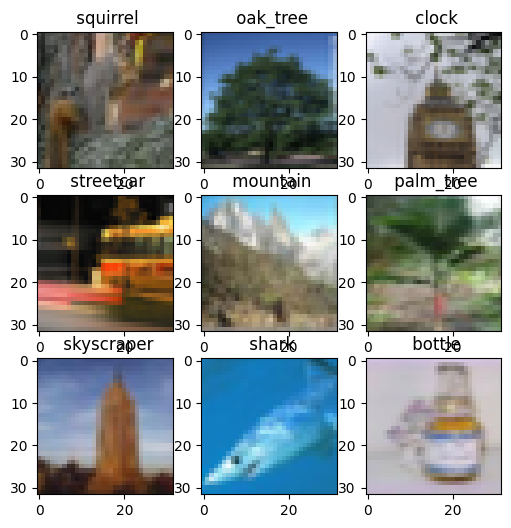

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
def mapping(array,di): 
    return [di[array[x][0]] for x in range(array.shape[0])]

def dict_mapp(array):
    dictionary = {}
    i = 0
    for j in range(array.shape[0]):
        if array[j][0] not in dictionary.keys():
            dictionary[array[j][0]] = i
            i+=1
    return dictionary


In [ ]:
#normilize our label_values to 0->19
label_dictionary = dict_mapp(y_train)
print(label_dictionary)

y_train_1 = np.array(mapping(y_train, label_dictionary))
y_val_1 = np.array(mapping(y_val, label_dictionary))
y_test_1 = np.array(mapping(y_test, label_dictionary))
print(type(y_test_1))
print(y_test_1)

{80: 0, 52: 1, 22: 2, 81: 3, 49: 4, 56: 5, 76: 6, 73: 7, 9: 8, 6: 9, 83: 10, 15: 11, 38: 12, 69: 13, 4: 14, 88: 15, 62: 16, 40: 17, 26: 18, 44: 19}
<class 'numpy.ndarray'>
[ 4 11  3 ... 10  1 10]


## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


Αρχικά ορίζουμε τη συνάρτηση για plot.

In [ ]:
def _plot(history,_cnn,  _num, _Optimizer, _batch_size, _epoc):
  plt.subplot(4, 2,_num)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  _title = _cnn+", Optimizer: " + _Optimizer+", BatchSize = "+ _batch_size + ", epochs = " + _epoc
  plt.title(_title,size=10)

<h1> LeNet CNN </h1>

In [ ]:
#LeNet architecture

def LeNet():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(32, 32, 3))) #LeNet input images have 28x28x3 size but we let the shape 32x32x3
    model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'))
    model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(84, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(20))#, activation='softmax'))


    return model
# def LeNet():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
#                                padding='same'),
#         tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#         tf.keras.layers.Conv2D(filters=16, kernel_size=5,
#                                activation='sigmoid'),
#         tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(120, activation='sigmoid'),
#         tf.keras.layers.Dense(84, activation='sigmoid'),
#         tf.keras.layers.Dense(10)])
    
LeNet_1 = LeNet()    



<h2>Πείραμα 1ο </h2>
<ul>
  <li> optimizer = adam </li>
  <li> epochs = 20 </li>
  <li> batch size = 64 </li>
  <li> loss function = cross entropy </li>
</ul>  

In [ ]:
LeNet_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#summary
LeNet_1.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [ ]:
#train model

history_lenet_1 = LeNet_1.fit(x_train, y_train_1, epochs=20, batch_size=64,
                    validation_data=(x_val, y_val_1))


Epoch 1/20
133/133 [==============================] - 12s 9ms/step - loss: 3.0079 - accuracy: 0.0506 - val_loss: 2.9960 - val_accuracy: 0.0587
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 2.8143 - accuracy: 0.1134 - val_loss: 2.6906 - val_accuracy: 0.1187
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 2.6184 - accuracy: 0.1507 - val_loss: 2.5847 - val_accuracy: 0.1740
Epoch 4/20
133/133 [==============================] - 1s 4ms/step - loss: 2.5450 - accuracy: 0.1780 - val_loss: 2.5510 - val_accuracy: 0.1807
Epoch 5/20
133/133 [==============================] - 1s 5ms/step - loss: 2.4760 - accuracy: 0.2033 - val_loss: 2.4924 - val_accuracy: 0.2113
Epoch 6/20
133/133 [==============================] - 1s 4ms/step - loss: 2.4282 - accuracy: 0.2189 - val_loss: 2.4610 - val_accuracy: 0.2060
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 2.3767 - accuracy: 0.2386 - val_loss: 2.4029 - val_accuracy: 0.2347
Epoch

Χρησιμοποιώντας το softmax στο τελευταίο επίπεδο (και from_logits=False) παρατηρούμε ελαφρά μείωση του accuracy και για αυτό δεν το χρησιμοποιούμε.

Προσθετουμε Batch Normalization προκειμένου να αντιμετωπίσουμε προβλήματα οπως το gradient vanishing (που οφείλεται στη sigmoid). 

In [ ]:
#LeNet architecture 

def LeNet():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120, activation='sigmoid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(84, activation='sigmoid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(20, activation='softmax')) #we add softmax activation function in last layer


    return model
    
LeNet_1_1 = LeNet()    



In [ ]:
LeNet_1_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #logits = false because we use softmax in last layer
              metrics=['accuracy'])

#summary
LeNet_1_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 6)        24        
 ormalization)                                                   
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
#train model

history_lenet_1_1 = LeNet_1_1.fit(x_train, y_train_1, epochs=20, batch_size=64,
                    validation_data=(x_val, y_val_1))


Epoch 1/20
133/133 [==============================] - 4s 8ms/step - loss: 2.3465 - accuracy: 0.3018 - val_loss: 3.0442 - val_accuracy: 0.0427
Epoch 2/20
133/133 [==============================] - 1s 6ms/step - loss: 1.9948 - accuracy: 0.3931 - val_loss: 2.9113 - val_accuracy: 0.0933
Epoch 3/20
133/133 [==============================] - 1s 7ms/step - loss: 1.8465 - accuracy: 0.4391 - val_loss: 2.4240 - val_accuracy: 0.2667
Epoch 4/20
133/133 [==============================] - 1s 6ms/step - loss: 1.7366 - accuracy: 0.4682 - val_loss: 2.0770 - val_accuracy: 0.3627
Epoch 5/20
133/133 [==============================] - 1s 6ms/step - loss: 1.6378 - accuracy: 0.4934 - val_loss: 1.9986 - val_accuracy: 0.4080
Epoch 6/20
133/133 [==============================] - 1s 6ms/step - loss: 1.5515 - accuracy: 0.5176 - val_loss: 1.9193 - val_accuracy: 0.4153
Epoch 7/20
133/133 [==============================] - 1s 10ms/step - loss: 1.4647 - accuracy: 0.5460 - val_loss: 1.8933 - val_accuracy: 0.4353
Epoch

Χρησιμοποιούμε το softmax (και from_logits = False) γιατί παρατηρούμε ελαφρά βελτίωση του accuracy στη περίπτωση αυτή.

Παρατηρούμε προφανώς πολύ καλύτερα αποτελέσματα και για το λόγο αυτό χρησιμοποιούμε Batch Normalization στο 2ο πείραμα.

<h2> Πείραμα 2ο </h2>
<ul>
  <li> optimizer = adagrad </li>
  <li> epochs = 30 </li>
  <li> batch size = 128 </li>
  <li> loss function = cross entropy </li>
</ul>  

In [ ]:
# def CatCrossEn_form(y, num_of_classes=20):
#   ret = np.zeros((y.shape[0], num_of_classes))
#   # print(y.shape)
#   # print(ret.shape)
#   for i in range(y.shape[0]):
#     ret[i][y[i]] = 1
#   return ret

# y_train_2 = CatCrossEn_form(y_train_1)
# y_test_2 = CatCrossEn_form(y_test_1)
# y_val_2 = CatCrossEn_form(y_val_1)
# print(y_train_2)   

In [ ]:
LeNet_2 = LeNet()

LeNet_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#summary
LeNet_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_4 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 batch_normalization_5 (Batc  (None, 12, 12, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
#train model

history_lenet_2 = LeNet_2.fit(x_train, y_train_1, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
67/67 [==============================] - 4s 13ms/step - loss: 2.3346 - accuracy: 0.3073 - val_loss: 3.1075 - val_accuracy: 0.0533
Epoch 2/30
67/67 [==============================] - 1s 8ms/step - loss: 1.9968 - accuracy: 0.3933 - val_loss: 3.0453 - val_accuracy: 0.0533
Epoch 3/30
67/67 [==============================] - 1s 8ms/step - loss: 1.8594 - accuracy: 0.4369 - val_loss: 2.9993 - val_accuracy: 0.0533
Epoch 4/30
67/67 [==============================] - 1s 8ms/step - loss: 1.7472 - accuracy: 0.4614 - val_loss: 2.9070 - val_accuracy: 0.1060
Epoch 5/30
67/67 [==============================] - 1s 8ms/step - loss: 1.6565 - accuracy: 0.4899 - val_loss: 2.7561 - val_accuracy: 0.1407
Epoch 6/30
67/67 [==============================] - 0s 7ms/step - loss: 1.5813 - accuracy: 0.5187 - val_loss: 2.4483 - val_accuracy: 0.2380
Epoch 7/30
67/67 [==============================] - 1s 13ms/step - loss: 1.4959 - accuracy: 0.5378 - val_loss: 2.1458 - val_accuracy: 0.3273
Epoch 8/30
67/67 [

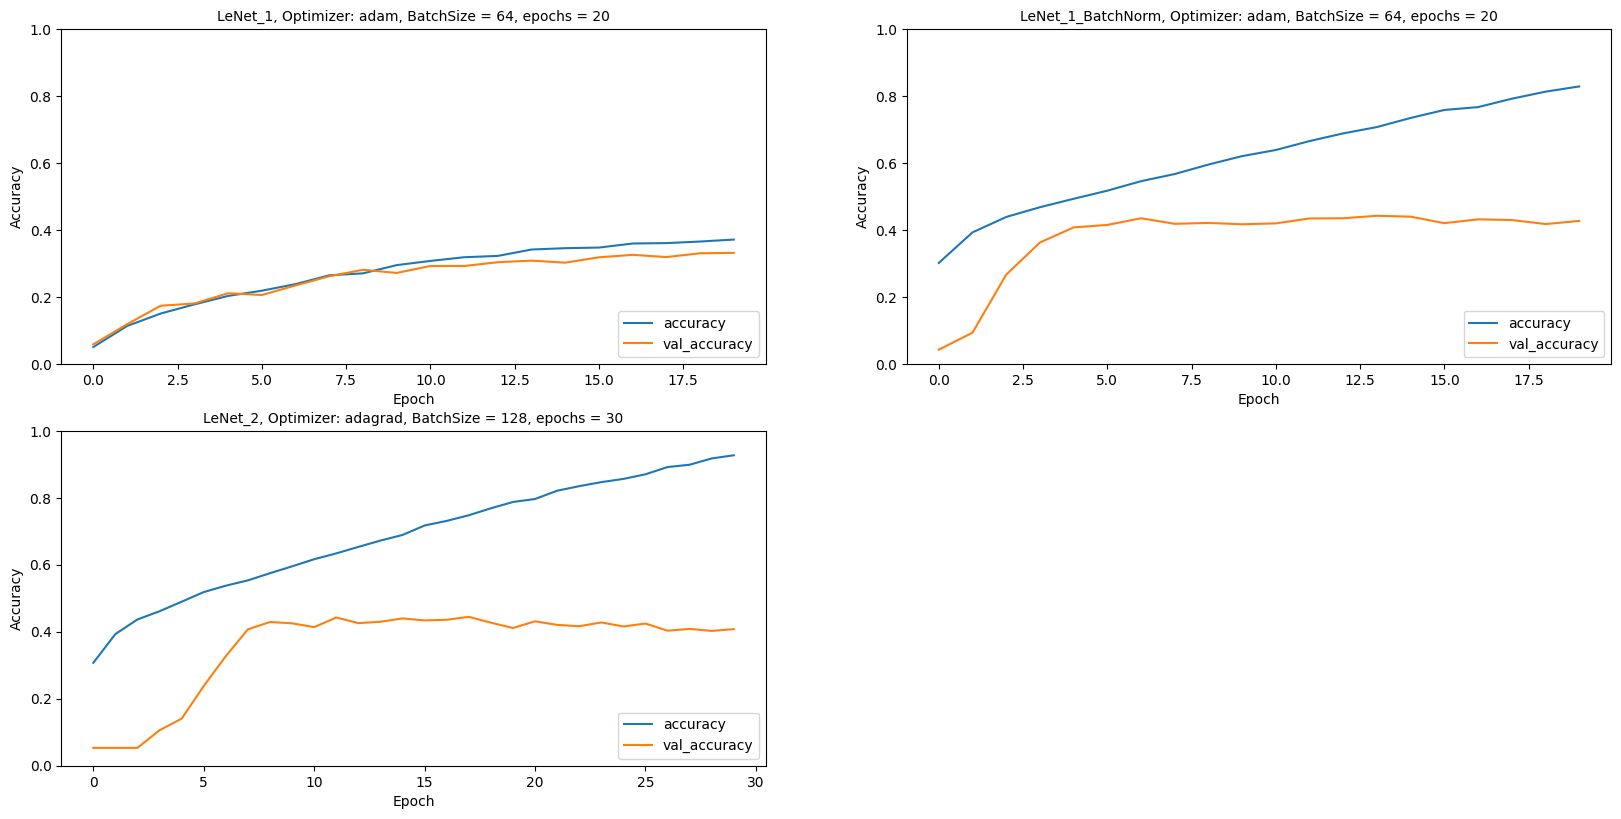

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_lenet_1, 'LeNet_1', 1, 'adam', '64', '20')
_plot(history_lenet_1_1, 'LeNet_1_BatchNorm', 2, 'adam', '64', '20')
_plot(history_lenet_2, 'LeNet_2', 3, 'adagrad', "128", "30")

In [ ]:
#κανουμε evaluate στο test set
print("LeNet_1")
loss_LeNet_1, accuracy_LeNet_1 = LeNet_1.evaluate(x_test, y_test_1, verbose = 0)
print("loss_LeNet_1 =", loss_LeNet_1, "accuracy_LeNet_1 =", accuracy_LeNet_1)

print("LeNet_1_BatchNorm")
loss_LeNet_BatchNorm_1, accuracy_LeNet_BatchNorm_1 = LeNet_1_1.evaluate(x_test, y_test_1, verbose = 0)
print("loss_LeNet_BatchNorm_1 =", loss_LeNet_BatchNorm_1, "accuracy_LeNet_BatchNorm_1 =", accuracy_LeNet_BatchNorm_1)

print("LeNet_2")
LeNet_2
loss_LeNet_2, accuracy_LeNet_2 = LeNet_2.evaluate(x_test, y_test_1, verbose = 0)
print("loss_LeNet_2 =", loss_LeNet_2, "accuracy_LeNet_2 =", accuracy_LeNet_2)

LeNet_1
loss_LeNet_1 = 2.091615676879883 accuracy_LeNet_1 = 0.3474999964237213
LeNet_1_BatchNorm
loss_LeNet_BatchNorm_1 = 2.489616870880127 accuracy_LeNet_BatchNorm_1 = 0.4230000078678131
LeNet_2
loss_LeNet_2 = 3.108962297439575 accuracy_LeNet_2 = 0.4059999883174896


<h1>AlexNet</h1>

Comment:

Κανονικά θα έπρεπε να χρησιμοποιήσουμε φωτογραφιές μεγέθους 256x256x3 σύμφωνα με το paper και σύμφωνα με την υλοποίηση 224x224x4, αλλά επειδή το collab crasharei για τόσο μεγάλες φωτογραφίες (error message: you have used all RAM memory) θα χρησιμοποιήσουμε εικόνες μεγέθους 128x128x3

In [ ]:
#AlexNet

def AlexNet(softmax=None):
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4,activation='relu',  input_shape=(224, 224, 3))) 
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same',activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20, activation=softmax))
  return model

AlexNet_1 = AlexNet() 


Πρέπει να κάνουμε resize τις εικόνες σε μέγεθος 128x128x3

In [ ]:
# import cv2

# x_train_resized = []
# for i in range(x_train.shape[0]):
#   x_train_resized.append(cv2.resize(x_train[i], (128,128), interpolation = cv2.INTER_CUBIC))

# x_train_resized = np.array(x_train_resized)
# print(x_train_resized.shape)

In [ ]:
# import cv2

# x_val_resized = []
# for i in range(x_val.shape[0]):
#   x_val_resized.append(cv2.resize(x_val[i], (128,128), interpolation = cv2.INTER_CUBIC))

# x_val_resized = np.array(x_val_resized)
# print(x_val_resized.shape)

In [ ]:
# import cv2

# x_test_resized = []
# for i in range(x_test.shape[0]):
#   x_test_resized.append(cv2.resize(x_test[i], (128,128), interpolation = cv2.INTER_CUBIC))

# x_test_resized = np.array(x_test_resized)
# print(x_test_resized.shape)

<h2>Πείραμα 1ο</h2>
<ul>
  <li> optimizer = adam </li>
  <li> epochs = 30 </li>
  <li> batch size = 256 </li>
  <li> loss function = cross entropy </li>
</ul> 

In [ ]:
AlexNet_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#summary
AlexNet_1.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
history_alexnet_1 = AlexNet_1.fit(x_train, y_train_1, epochs=30, batch_size=256,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
34/34 [==============================] - 25s 446ms/step - loss: 3.0784 - accuracy: 0.0591 - val_loss: 2.9968 - val_accuracy: 0.0460
Epoch 2/30
34/34 [==============================] - 9s 272ms/step - loss: 2.9680 - accuracy: 0.0755 - val_loss: 2.8648 - val_accuracy: 0.1033
Epoch 3/30
34/34 [==============================] - 9s 264ms/step - loss: 2.7912 - accuracy: 0.1422 - val_loss: 2.6774 - val_accuracy: 0.1707
Epoch 4/30
34/34 [==============================] - 10s 283ms/step - loss: 2.5125 - accuracy: 0.2093 - val_loss: 2.4390 - val_accuracy: 0.2147
Epoch 5/30
34/34 [==============================] - 9s 272ms/step - loss: 2.3594 - accuracy: 0.2527 - val_loss: 2.3106 - val_accuracy: 0.2640
Epoch 6/30
34/34 [==============================] - 9s 270ms/step - loss: 2.2245 - accuracy: 0.3002 - val_loss: 2.2910 - val_accuracy: 0.3060
Epoch 7/30
34/34 [==============================] - 9s 263ms/step - loss: 2.0723 - accuracy: 0.3516 - val_loss: 2.1176 - val_accuracy: 0.3433
Epoc

<h2>Πείραμα 2ο</h2>
<ul>
  <li> optimizer = adam </li>
  <li> epochs = 25 </li>
  <li> batch size = 128 </li>
  <li> loss function = cross entropy </li>
</ul> 

Επίσης στο τελευταίο Layer έχουμε βάλει και softmax activation function.

In [ ]:
AlexNet_2 = AlexNet()

In [ ]:
AlexNet_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#summary
AlexNet_2.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 384)      

In [ ]:
#train model

history_alexnet_2 = AlexNet_2.fit(x_train, y_train_1, epochs=25, batch_size=128,
                    validation_data=(x_val, y_val_1))

Epoch 1/25
67/67 [==============================] - 16s 148ms/step - loss: 3.0979 - accuracy: 0.0468 - val_loss: 2.9980 - val_accuracy: 0.0420
Epoch 2/25
67/67 [==============================] - 10s 143ms/step - loss: 2.9965 - accuracy: 0.0479 - val_loss: 2.9976 - val_accuracy: 0.0393
Epoch 3/25
67/67 [==============================] - 10s 148ms/step - loss: 2.9961 - accuracy: 0.0508 - val_loss: 2.9974 - val_accuracy: 0.0393
Epoch 4/25
67/67 [==============================] - 10s 143ms/step - loss: 2.9960 - accuracy: 0.0471 - val_loss: 2.9974 - val_accuracy: 0.0393
Epoch 5/25
67/67 [==============================] - 9s 129ms/step - loss: 2.9960 - accuracy: 0.0512 - val_loss: 2.9977 - val_accuracy: 0.0393
Epoch 6/25
67/67 [==============================] - 10s 142ms/step - loss: 2.9960 - accuracy: 0.0504 - val_loss: 2.9976 - val_accuracy: 0.0393
Epoch 7/25
67/67 [==============================] - 9s 141ms/step - loss: 2.9958 - accuracy: 0.0507 - val_loss: 2.9976 - val_accuracy: 0.0393
E

<h3> Πειραματιζόμαστε χρησιμοποιώντας LeakyReLU με τα ίδια configuraitons όπως το </h3>

In [ ]:
def AlexNet_Leaky_ReLU(softmax=None):
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4,  input_shape=(224, 224, 3))) 
  model.add(layers.LeakyReLU(alpha=0.2))  
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20, activation=softmax))
  return model

AlexNet_Leaky = AlexNet_Leaky_ReLU(softmax='softmax') 

In [ ]:
AlexNet_Leaky.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#summary
AlexNet_Leaky.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 26, 26, 256)       0         
                                                      

In [ ]:
history_AlexNet_Leaky = AlexNet_Leaky.fit(x_train, y_train_1, epochs=30, batch_size=256,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
34/34 [==============================] - 20s 450ms/step - loss: 29.7127 - accuracy: 0.0542 - val_loss: 27.8239 - val_accuracy: 0.0500
Epoch 2/30
34/34 [==============================] - 10s 296ms/step - loss: 660.8945 - accuracy: 0.0526 - val_loss: 2011.9124 - val_accuracy: 0.0540
Epoch 3/30
34/34 [==============================] - 10s 298ms/step - loss: 5925.0103 - accuracy: 0.0526 - val_loss: 2828.6353 - val_accuracy: 0.0540
Epoch 4/30
34/34 [==============================] - 10s 299ms/step - loss: 4826.9287 - accuracy: 0.0580 - val_loss: 542.0034 - val_accuracy: 0.0393
Epoch 5/30
34/34 [==============================] - 10s 296ms/step - loss: 262.1129 - accuracy: 0.0626 - val_loss: 35.9837 - val_accuracy: 0.0587
Epoch 6/30
34/34 [==============================] - 10s 295ms/step - loss: 37.7998 - accuracy: 0.0741 - val_loss: 15.3795 - val_accuracy: 0.0947
Epoch 7/30
34/34 [==============================] - 10s 299ms/step - loss: 16.5483 - accuracy: 0.0861 - val_loss: 17.85

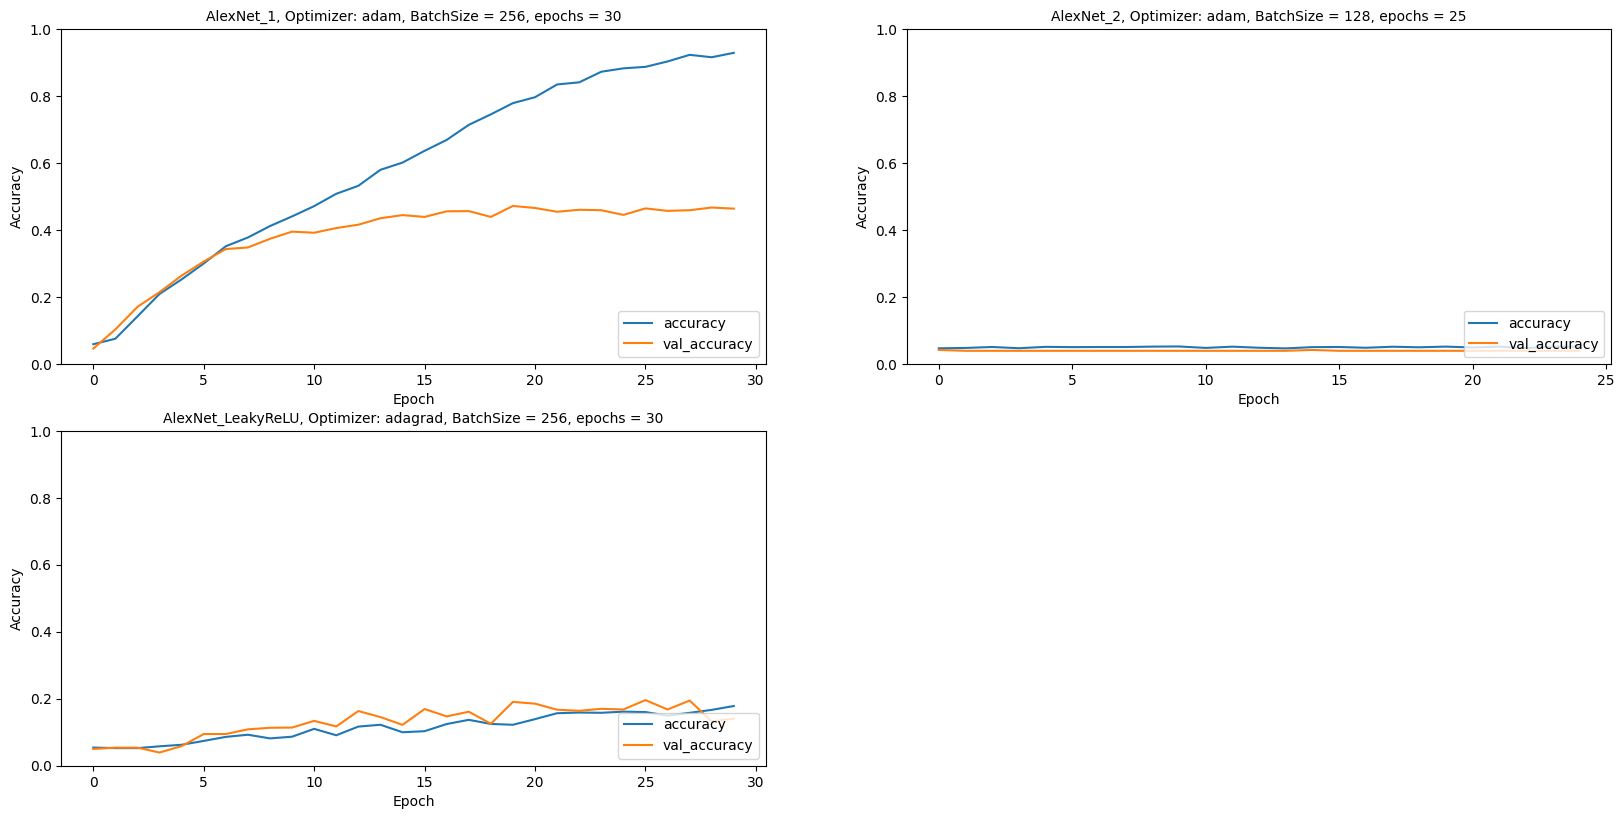

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_alexnet_1, 'AlexNet_1', 1, 'adam', '256', '30')
_plot(history_alexnet_2, 'AlexNet_2', 2, 'adam', '128', '25')
_plot(history_AlexNet_Leaky, 'AlexNet_LeakyReLU', 3, 'adagrad', "256", "30")

In [ ]:
#κανουμε evaluate στο test set
print("AlexNet_1")
loss_AlexNet_1, accuracy_AlexNet_1 = AlexNet_1.evaluate(x_test, y_test_1)
print("loss_AlexNet_1 =", loss_AlexNet_1, "accuracy_AlexNet_1 =", accuracy_AlexNet_1)

print("AlexNet_2")
loss_AlexNet_2, accuracy_AlexNet_2 = AlexNet_2.evaluate(x_test, y_test_1)
print("loss_AlexNet_2 =", loss_AlexNet_2, "accuracy_AlexNet_2 =", accuracy_AlexNet_2)

print("AlexNet_Leaky")
loss_AlexNet_Leaky, accuracy_AlexNet_Leaky = AlexNet_Leaky.evaluate(x_test, y_test_1)
print("loss_AlexNet_Leaky =", loss_AlexNet_Leaky, "accuracy_AlexNet_Leaky =", accuracy_AlexNet_Leaky)

AlexNet_1
63/63 [==============================] - 2s 24ms/step - loss: 3.1431 - accuracy: 0.4805
loss_AlexNet_1 = 3.1430575847625732 accuracy_AlexNet_1 = 0.4805000126361847
AlexNet_2
63/63 [==============================] - 2s 26ms/step - loss: 2.9959 - accuracy: 0.0500
loss_AlexNet_2 = 2.995903730392456 accuracy_AlexNet_2 = 0.05000000074505806
AlexNet_Leaky
63/63 [==============================] - 2s 26ms/step - loss: 3.1872 - accuracy: 0.1695
loss_AlexNet_Leaky = 3.187201499938965 accuracy_AlexNet_Leaky = 0.16949999332427979


<h3> Σχεδόν 0.6 accuracy στο test set! </h3>  

Παρατηρούμε ότι το ALexNet με LeakyReLU είναι πολύ consistent (δηλαδή αυξάνεται, από εάν σημείο και μετά, συνέχεια το val_accuracy, σε σχέση με όλα τα υπόλοιπα όπου από ένα σημείο και μετά κάνουν overfit και το accuracy στο validation test δεν αυξάνεται καθόλου και παραμένει σταθερό) και για το λόγω αυτό του δίνουμε μία δεύτερη ευκαιρία με περισότερες εποχές. Επίσης πέρα από το γεγονός ότι αυξάνεται συνέχεια το val_accuracy παρατηρούμε ότι ακολουθεί σε πολύ μεγάλο βαθμό το accuracy στο test set.

Οι παραπάνω παρατηρήσεις είναι παρατηρήσιμες και από τα παραπάνω διαγράμματα! 

Τα παραπάνω δεν πιστεύουμε πως 'έτυχαν' γιατί σχεδόν όλες τις φορές που το τρέξαμε με LeakyReLU είχαμε πολύ παρόμοια συμπεριφορά και τις περισσότερες φορές καλύτερα accuracy. 

In [ ]:
def AlexNet_Leaky_ReLU(softmax=None):
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4,  input_shape=(224, 224, 3))) 
  model.add(layers.LeakyReLU(alpha=0.2))  
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  # layers.SpatialDropout2D(0.2)
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  # layers.SpatialDropout2D(0.2)
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  # layers.SpatialDropout2D(0.4)
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  # layers.SpatialDropout2D(0.4)
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
  model.add(layers.LeakyReLU(alpha=0.1))          
  # layers.SpatialDropout2D(0.3)
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  # layers.SpatialDropout2D(0.4)
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096))
  model.add(layers.LeakyReLU(alpha=0.2))          
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20, activation=softmax))
  return model

In [ ]:
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
   initial_lrate = 0.4
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)
callback_list = [lrate]
AlexNet_Leaky_ReLU_second_chance = AlexNet_Leaky_ReLU(softmax='softmax')
# opt = tf.keras.optimizers.Adam(learning_rate=lrate)

AlexNet_Leaky_ReLU_second_chance.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#summary
AlexNet_Leaky_ReLU_second_chance.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 26, 26, 96)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 26, 256)       614656    
                                                      

In [ ]:

history_AlexNet_Leaky_ReLU_second_change = AlexNet_Leaky_ReLU_second_chance.fit(x_train, y_train_1, epochs=60, batch_size=256,
                    validation_data=(x_val, y_val_1))

Epoch 1/60
34/34 [==============================] - 14s 339ms/step - loss: 24.5470 - accuracy: 0.0499 - val_loss: 43.3806 - val_accuracy: 0.0480
Epoch 2/60
34/34 [==============================] - 11s 326ms/step - loss: 63.5976 - accuracy: 0.0552 - val_loss: 107.0005 - val_accuracy: 0.0513
Epoch 3/60
34/34 [==============================] - 11s 327ms/step - loss: 15.8910 - accuracy: 0.0511 - val_loss: 85.7488 - val_accuracy: 0.0553
Epoch 4/60
34/34 [==============================] - 11s 338ms/step - loss: 4143.2871 - accuracy: 0.0522 - val_loss: 6631.6934 - val_accuracy: 0.0507
Epoch 5/60
34/34 [==============================] - 11s 324ms/step - loss: 12358.0156 - accuracy: 0.0509 - val_loss: 2216.1514 - val_accuracy: 0.0433
Epoch 6/60
34/34 [==============================] - 11s 329ms/step - loss: 749.2408 - accuracy: 0.0575 - val_loss: 636.3780 - val_accuracy: 0.0620
Epoch 7/60
34/34 [==============================] - 11s 316ms/step - loss: 71.6666 - accuracy: 0.0546 - val_loss: 417.

Παρατηρούμε μία πολύ μική αύξηση σε σχέση με πριν, αλλά παρατηρώντας το history κάποια στιγμή έπιασε 0.61 ενώ επίσης όλα τα τελευταία προηγούμενα του τελευταίου αποτελέσματος παρατηρούμε πως είναι μεγαλύτερα του 0.5773 και για το λόγο αυτό μπορεί να πει κανείς πως θα παίρναμε πολύ καλά αποτελέσματα εάν κάπως μειώναμε το learing rate στις τελευταίες εποχές προκειμένου να συγκλίνει ακόμα καλύτερα. 

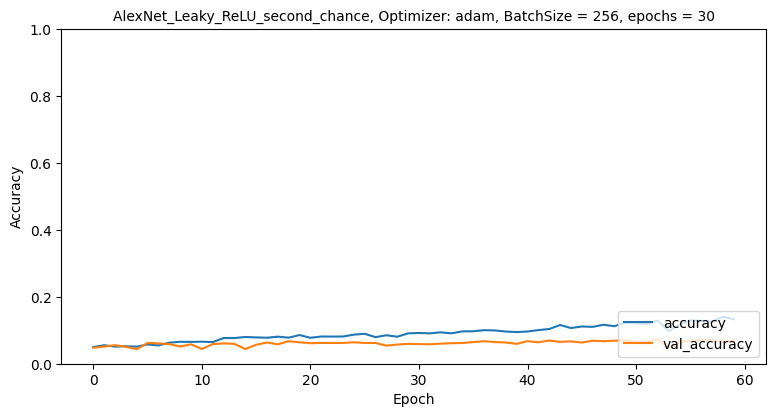

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_AlexNet_Leaky_ReLU_second_change, 'AlexNet_Leaky_ReLU_second_chance', 1, 'adam', '256', '30')

In [ ]:
#κανουμε evaluate στο test set
print("AlexNet_Leaky_ReLU_second_chance")
loss_AlexNet_Leaky_ReLU_second_chance, accuracy_AlexNet_Leaky_ReLU_second_chance = AlexNet_Leaky_ReLU_second_chance.evaluate(x_test, y_test_1)
print("loss_AlexNet_Leaky_ReLU_second_chance =", loss_AlexNet_Leaky_ReLU_second_chance, "accuracy_AlexNet_Leaky_ReLU_second_chance =", accuracy_AlexNet_Leaky_ReLU_second_chance)

AlexNet_Leaky_ReLU_second_chance
63/63 [==============================] - 1s 23ms/step - loss: 1202.7683 - accuracy: 0.0645
loss_AlexNet_Leaky_ReLU_second_chance = 1202.768310546875 accuracy_AlexNet_Leaky_ReLU_second_chance = 0.06449999660253525


Επίσης παρατηρούμε μία μικρή αύξηση στο test set.

<h1>VGG</h1> 

In [ ]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                   padding='same', activation='relu'))
        blk.add(layers.BatchNormalization())
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk


In [ ]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [ ]:
def vgg(conv_arch, softmax=None):
    net = tf.keras.models.Sequential()
    net.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(
        tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(20, activation=softmax)]))
    return net

VGG_1 = vgg(conv_arch)    

<h2>Πείραμα 1ο</h2>
<ul>
  <li> optimizer = adam </li>
  <li> epochs = 18 </li>
  <li> batch size = 150 </li>
  <li> loss function = cross entropy </li>
</ul>

In [ ]:
VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#summary
VGG_1.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 112, 112, 64)      2048      
                                                                 
 sequential_9 (Sequential)   (None, 56, 56, 128)       74368     
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 256)       887296    
                                                                 
 sequential_11 (Sequential)  (None, 14, 14, 512)       3544064   
                                                                 
 sequential_12 (Sequential)  (None, 7, 7, 512)         4723712   
                                                                 
 sequential_13 (Sequential)  (None, 20)               

In [ ]:
history = VGG_1.fit(x_train, y_train_1, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
67/67 [==============================] - 125s 1s/step - loss: 10.2278 - accuracy: 0.1671 - val_loss: 10.5644 - val_accuracy: 0.0687
Epoch 2/30
67/67 [==============================] - 73s 1s/step - loss: 2.6835 - accuracy: 0.2267 - val_loss: 3.2444 - val_accuracy: 0.0707
Epoch 3/30
67/67 [==============================] - 75s 1s/step - loss: 2.4367 - accuracy: 0.2699 - val_loss: 3.2275 - val_accuracy: 0.0833
Epoch 4/30
67/67 [==============================] - 75s 1s/step - loss: 2.3286 - accuracy: 0.3006 - val_loss: 2.8694 - val_accuracy: 0.1513
Epoch 5/30
67/67 [==============================] - 73s 1s/step - loss: 2.2626 - accuracy: 0.3078 - val_loss: 2.7814 - val_accuracy: 0.1507
Epoch 6/30
67/67 [==============================] - 75s 1s/step - loss: 2.1665 - accuracy: 0.3353 - val_loss: 2.6589 - val_accuracy: 0.2153
Epoch 7/30
67/67 [==============================] - 75s 1s/step - loss: 2.1284 - accuracy: 0.3509 - val_loss: 2.4282 - val_accuracy: 0.2320
Epoch 8/30
67/67 

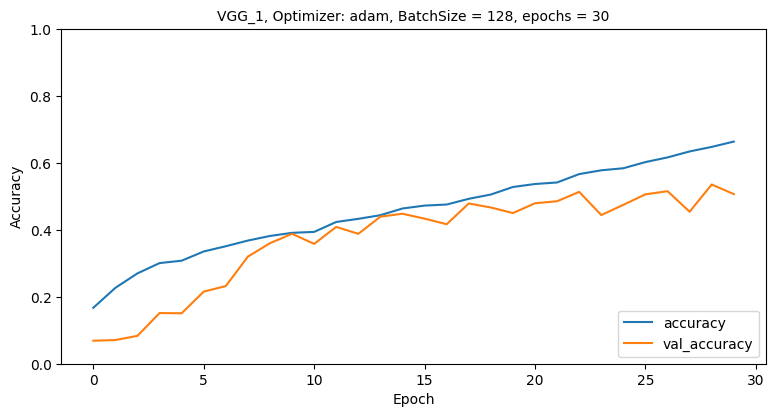

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history, 'VGG_1', 1, 'adam', '128', '30')

In [ ]:
#κανουμε evaluate στο test set
print("VGG_1")
loss_VGG_1, accuracy_VGG_1 = VGG_1.evaluate(x_test, y_test_1)
print("loss_VGG_1 =", loss_VGG_1, "accuracy_VGG_1 =", accuracy_VGG_1)


VGG_1
63/63 [==============================] - 9s 97ms/step - loss: 1.7103 - accuracy: 0.5280
loss_VGG_1 = 1.7103426456451416 accuracy_VGG_1 = 0.527999997138977


<h2>Πείραμα 2ο</h2>
<ul>
  <li> optimizer = adagrad </li>
  <li> epochs = 50 </li>
  <li> batch size = 256 </li>
  <li> loss function = cross entropy </li>
</ul>

Επίσης στο τελευταίο Layer έχουμε βάλει και softmax activation function.

In [ ]:
def vgg(conv_arch, softmax=None):
    net = tf.keras.models.Sequential()
    net.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(
        tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(20, activation=softmax)]))
    return net

In [ ]:
VGG_2 = vgg(conv_arch, softmax='softmax')

In [ ]:
VGG_2.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#summary
VGG_2.summary() 

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 sequential_15 (Sequential)  (None, 112, 112, 64)      2048      
                                                                 
 sequential_16 (Sequential)  (None, 56, 56, 128)       74368     
                                                                 
 sequential_17 (Sequential)  (None, 28, 28, 256)       887296    
                                                                 
 sequential_18 (Sequential)  (None, 14, 14, 512)       3544064   
                                                                 
 sequential_19 (Sequential)  (None, 7, 7, 512)         4723712   
                                                                 
 sequential_20 (Sequential)  (None, 20)              

In [ ]:
# run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)

history_VGG_2 = VGG_2.fit(x_train, y_train_1, epochs=30, batch_size=64,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
133/133 [==============================] - 96s 575ms/step - loss: 3.0237 - accuracy: 0.2375 - val_loss: 3.3364 - val_accuracy: 0.0393
Epoch 2/30
133/133 [==============================] - 72s 539ms/step - loss: 2.2198 - accuracy: 0.3540 - val_loss: 4.0417 - val_accuracy: 0.0433
Epoch 3/30
133/133 [==============================] - 69s 522ms/step - loss: 1.8959 - accuracy: 0.4339 - val_loss: 3.2931 - val_accuracy: 0.1533
Epoch 4/30
133/133 [==============================] - 71s 536ms/step - loss: 1.6986 - accuracy: 0.4812 - val_loss: 2.0955 - val_accuracy: 0.3680
Epoch 5/30
133/133 [==============================] - 70s 523ms/step - loss: 1.5524 - accuracy: 0.5171 - val_loss: 1.6301 - val_accuracy: 0.4933
Epoch 6/30
133/133 [==============================] - 71s 537ms/step - loss: 1.4163 - accuracy: 0.5584 - val_loss: 1.5521 - val_accuracy: 0.5247
Epoch 7/30
133/133 [==============================] - 72s 539ms/step - loss: 1.3018 - accuracy: 0.5969 - val_loss: 1.4756 - val_ac

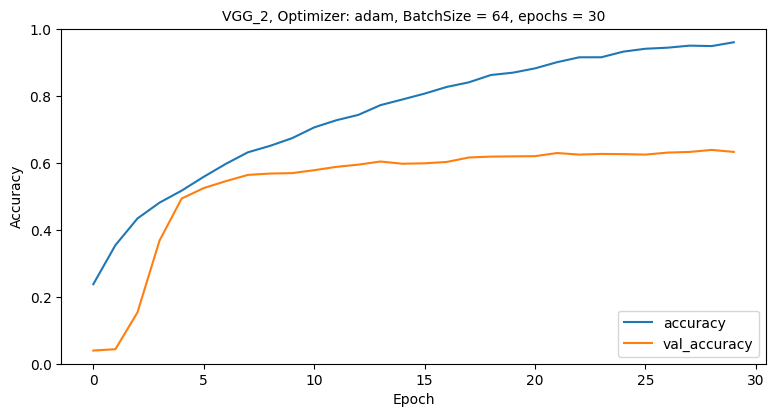

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_VGG_2, 'VGG_2', 1, 'adam', '64', '30')

In [ ]:
print("VGG_2")
loss_VGG_2, accuracy_VGG_2 = VGG_2.evaluate(x_test, y_test_1)
print("loss_VGG_2 =", loss_VGG_2, "accuracy_VGG_2 =", accuracy_VGG_2)

VGG_2
63/63 [==============================] - 5s 78ms/step - loss: 1.2887 - accuracy: 0.6450
loss_VGG_2 = 1.2887135744094849 accuracy_VGG_2 = 0.6449999809265137


<h1>MyCNN</h1>


Αρχιτεκτονική:
Αρχικά σε κάθε layer χρησιμοποιούμε ως activation function τη ReLU (για λόγους που εξηγήθηκαν στο θεωρητικό Μέρος.
Επίσης χηρσιμοποιούμε Dropout στα Dense Layers προκειμένου να αποφύγουμε το overfitting.

In [ ]:
def vgg_block_new(num_convs, num_channels, _kernel_size):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size= _kernel_size,
                                   padding='same', activation='relu'))
        blk.add(layers.BatchNormalization())
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [ ]:
def myCNN():
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(96, 96, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(50, (9, 9), activation='relu', input_shape=(96, 96, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(100, (7, 7), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(vgg_block_new(2, 150,5))
  model.add(vgg_block_new(3, 250, 3))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dense(20, activation='softmax'))
  return model

In [ ]:
myCNN_1 = myCNN()
myCNN_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#summary
myCNN_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_6 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 conv2d_42 (Conv2D)          (None, 88, 88, 50)        12200     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 44, 44, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 38, 38, 100)       245100    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 19, 19, 100)      0         
 g2D)                                                            
                                                                 
 sequential_22 (Sequential)  (None, 9, 9, 150)       

In [ ]:
history_myCNN_1 = myCNN_1.fit(x_train, y_train_1, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
67/67 [==============================] - 22s 196ms/step - loss: 3.8376 - accuracy: 0.1826 - val_loss: 8.3420 - val_accuracy: 0.0867
Epoch 2/30
67/67 [==============================] - 9s 138ms/step - loss: 2.2023 - accuracy: 0.3053 - val_loss: 3.3739 - val_accuracy: 0.1420
Epoch 3/30
67/67 [==============================] - 9s 137ms/step - loss: 2.0099 - accuracy: 0.3636 - val_loss: 2.3110 - val_accuracy: 0.2873
Epoch 4/30
67/67 [==============================] - 9s 134ms/step - loss: 1.8573 - accuracy: 0.4141 - val_loss: 2.4553 - val_accuracy: 0.2847
Epoch 5/30
67/67 [==============================] - 9s 133ms/step - loss: 1.6997 - accuracy: 0.4580 - val_loss: 2.2161 - val_accuracy: 0.3527
Epoch 6/30
67/67 [==============================] - 9s 133ms/step - loss: 1.5100 - accuracy: 0.5162 - val_loss: 3.9299 - val_accuracy: 0.1527
Epoch 7/30
67/67 [==============================] - 9s 136ms/step - loss: 1.2949 - accuracy: 0.5834 - val_loss: 2.6311 - val_accuracy: 0.3540
Epoch

Παρατηρούμε overfitting και αυτό είναι απόλυτα λογικό καθώς δεν έχουμε κάνει τίποτα για να το αποτρέψουμε (θα προσπαθήσουμε να το αποτρέψουμε στο 2ο Μέρος). 

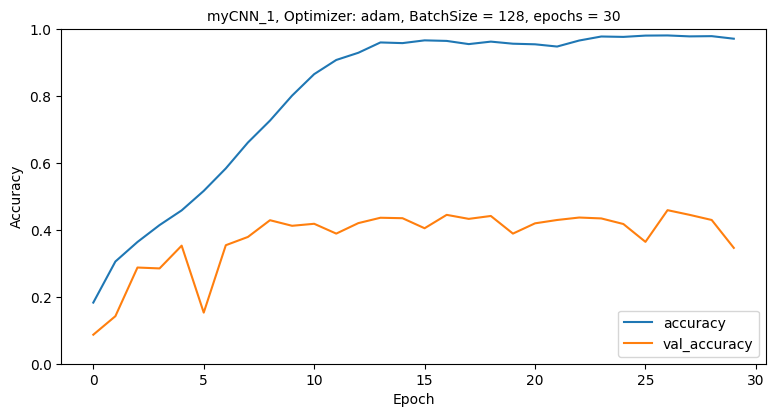

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_myCNN_1, 'myCNN_1', 1, 'adam', '128', '30')

In [ ]:
print("myCNN_1")
loss_myCNN_1, accuracy_myCNN_1 = myCNN_1.evaluate(x_test, y_test_1)
print("loss_myCNN_1 =", loss_myCNN_1, "accuracy_myCNN_1 =", accuracy_myCNN_1)

myCNN_1
63/63 [==============================] - 2s 20ms/step - loss: 6.1732 - accuracy: 0.3570
loss_myCNN_1 = 6.173184394836426 accuracy_myCNN_1 = 0.3569999933242798


Όσον αφορά τη 2η περίπτωση για λόγους πειραματισμού αντικαθιστούμε τη ReLU με τη LeakyReLU.

In [ ]:
def vgg_block_new(num_convs, num_channels, _kernel_size):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size= _kernel_size,
                                   padding='same'))
        blk.add(layers.LeakyReLU(alpha=0.15))
        blk.add(layers.BatchNormalization())
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [ ]:
def myCNN_LeakyReLU():
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(96, 96, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(50, (9, 9), input_shape=(96, 96, 3)))
  model.add(layers.LeakyReLU(alpha=0.15))    
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(100, (7, 7)))
  model.add(layers.LeakyReLU(alpha=0.15))    
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(vgg_block_new(2, 150,5))
  model.add(vgg_block_new(3, 250, 3))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096))
  model.add(layers.LeakyReLU(alpha=0.15))    
  model.add(layers.Dense(2048))
  model.add(layers.Dense(20, activation='softmax'))
  return model

In [ ]:
myCNN_2 = myCNN_LeakyReLU()
myCNN_2.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#summary
myCNN_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_7 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 conv2d_49 (Conv2D)          (None, 88, 88, 50)        12200     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 88, 88, 50)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 44, 44, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 38, 38, 100)       245100    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 38, 38, 100)       0         
                                                     

In [ ]:
history_myCNN_2 = myCNN_2.fit(x_train, y_train_1, epochs=30, batch_size=256,
                    validation_data=(x_val, y_val_1))

Epoch 1/30
34/34 [==============================] - 25s 392ms/step - loss: 2.6530 - accuracy: 0.2604 - val_loss: 2.9914 - val_accuracy: 0.0433
Epoch 2/30
34/34 [==============================] - 10s 286ms/step - loss: 1.9987 - accuracy: 0.3905 - val_loss: 2.9923 - val_accuracy: 0.0720
Epoch 3/30
34/34 [==============================] - 10s 283ms/step - loss: 1.6951 - accuracy: 0.4755 - val_loss: 3.0062 - val_accuracy: 0.0553
Epoch 4/30
34/34 [==============================] - 10s 282ms/step - loss: 1.4907 - accuracy: 0.5402 - val_loss: 3.0265 - val_accuracy: 0.0547
Epoch 5/30
34/34 [==============================] - 10s 281ms/step - loss: 1.3425 - accuracy: 0.5840 - val_loss: 3.0676 - val_accuracy: 0.0547
Epoch 6/30
34/34 [==============================] - 9s 279ms/step - loss: 1.2009 - accuracy: 0.6325 - val_loss: 3.0965 - val_accuracy: 0.0613
Epoch 7/30
34/34 [==============================] - 10s 297ms/step - loss: 1.0690 - accuracy: 0.6799 - val_loss: 3.1661 - val_accuracy: 0.0727


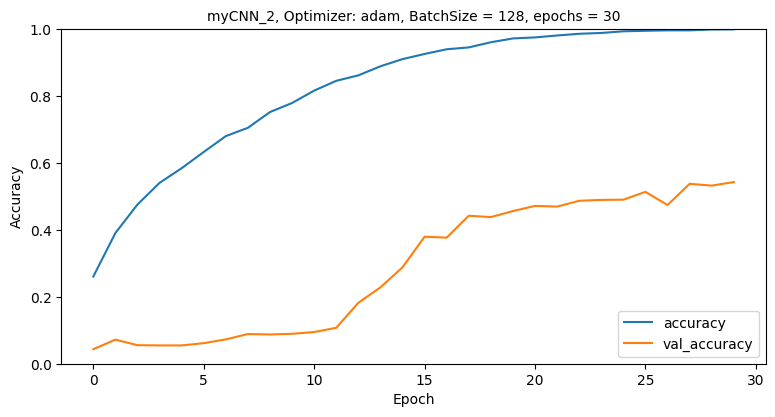

In [ ]:
#Παραθέτουμε σε μορφή διαγραμμάτων τα παραπάνω αποτελέσματα:
plt.figure(figsize=(20, 20))
_plot(history_myCNN_2, 'myCNN_2', 1, 'adam', '128', '30')

In [ ]:
print("myCNN_2")
loss_myCNN_2, accuracy_myCNN_2 = myCNN_2.evaluate(x_test, y_test_1)
print("loss_myCNN_2 =", loss_myCNN_2, "accuracy_myCNN_2 =", accuracy_myCNN_2)

myCNN_2
63/63 [==============================] - 2s 24ms/step - loss: 1.5465 - accuracy: 0.5545
loss_myCNN_2 = 1.5465108156204224 accuracy_myCNN_2 = 0.5544999837875366


Προφανώς παρατηρούμε πολύ καλύτερα αποτελέσματα στη 2η περίπτωση και για το λόγο αυτό θα χρησιμοποιήσουμε αυτή στο 2ο Μέρος.


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

θα χρησιμοποιήσουμε Dropout με αυξανόμενο **p** καθώς αυξάντονται οι παράμετροι στα layers (καθώς όσο αυξάνονται οι παράμετροι τόσο πιο εύκολα κάνει overfit το αντίστοιχο layer).



<h1> Πείραμα 1ο </h1>

<h2> Data Augmentation </h2>

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#                     rotation_range=20,
#                     horizontal_flip=True,
#                     zoom_range=0.3
#                     )
# # datagen.fit(x_train)

from keras.utils import np_utils
classes_num = 20
# data augmentation
y_train_categ = np_utils.to_categorical(y_train_1, classes_num)
y_test_categ = np_utils.to_categorical(y_test_1, classes_num)
y_val_categ = np_utils.to_categorical(y_val_1, classes_num)

# define a  data generator for train and validation set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2)

# define a data generator for test set
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# data_gen.fit(x_train)

Προσθέτουμε Dropout με τη λογική που προανέφερα.

In [ ]:
 
def myCNN_LeakyReLU_goodbye_overfitting():
  model = tf.keras.models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bicubic", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(50, (9, 9), input_shape=(224, 224, 3)))
  model.add(layers.LeakyReLU(alpha=0))    
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.05))
  model.add(layers.Conv2D(100, (7, 7)))
  model.add(layers.Dropout(0.7))
  model.add(layers.LeakyReLU(alpha=0))    
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(vgg_block_new(2, 150, 5))
  model.add(layers.Dropout(0.1))
  model.add(vgg_block_new(3, 250, 3))
  model.add(layers.Dropout(0.14))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096))
  model.add(layers.Dropout(0.18))
  model.add(layers.LeakyReLU(alpha=0))    
  model.add(layers.Dense(2048))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20, activation='softmax'))
  return model


In [ ]:
my_CNN_gb_overfit_1 = myCNN_LeakyReLU_goodbye_overfitting()

my_CNN_gb_overfit_1.compile(optimizer='adagrad',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

my_CNN_gb_overfit_1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_8 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 216, 216, 50)      12200     
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 216, 216, 50)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 108, 108, 50)     0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 108, 108, 50)      0         
                                                                 
 conv2d_57 (Conv2D)          (None, 102, 102, 100)     245100    
                                                     

In [ ]:
from keras.utils import np_utils

# y_train_categ = np_utils.to_categorical(y_train_1, 20)
# y_test_categ = np_utils.to_categorical(y_test_1, 20)
# y_val_categ = np_utils.to_categorical(y_val_1, 20)

# datagen.fit(x_train)

#real time data augmentation:
history_my_CNN_gb_overfit_1 = my_CNN_gb_overfit_1.fit(datagen.flow(x_train, y_train_1, batch_size=100), steps_per_epoch=len(x_train)/100, epochs=60, validation_data = datagen.flow(x_val, y_val_1, batch_size=8), validation_steps = len(x_val)/8)



Epoch 1/60
85/85 [==============================] - 101s 916ms/step - loss: 3.7740 - accuracy: 0.2401 - val_loss: 3.6352 - val_accuracy: 0.0587
Epoch 2/60
85/85 [==============================] - 76s 898ms/step - loss: 2.2665 - accuracy: 0.3491 - val_loss: 4.6151 - val_accuracy: 0.0673
Epoch 3/60
85/85 [==============================] - 76s 899ms/step - loss: 2.0207 - accuracy: 0.4006 - val_loss: 4.6197 - val_accuracy: 0.0713
Epoch 4/60
85/85 [==============================] - 76s 896ms/step - loss: 1.8454 - accuracy: 0.4341 - val_loss: 4.1918 - val_accuracy: 0.0933
Epoch 5/60
85/85 [==============================] - 76s 899ms/step - loss: 1.7476 - accuracy: 0.4646 - val_loss: 4.8702 - val_accuracy: 0.0947
Epoch 6/60
85/85 [==============================] - 76s 897ms/step - loss: 1.6571 - accuracy: 0.4815 - val_loss: 3.9665 - val_accuracy: 0.1340
Epoch 7/60
85/85 [==============================] - 76s 895ms/step - loss: 1.5886 - accuracy: 0.5062 - val_loss: 3.8662 - val_accuracy: 0.140

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
